In [84]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
%matplotlib inline
import itertools
import matplotlib.pyplot as plt

def get_single_file(file='trafficData158324.csv'):
    df = pd.read_csv(file)
    print(df.shape)
    return df

def get_all_files(path='/home/enigmaeth/LTP/citypulse/traffic_feb_june'):
    all_files = [join(path,f) for f in listdir(path)[:int(len(listdir(path))*0.1)] if isfile(join(path, f))]
    df = pd.concat((pd.read_csv(f) for f in all_files))
    print(df.shape)
    return df

labels = ['avgSpeed', 'avgMeasuredTime', 'vehicleCount']
df_ = get_all_files()
df_.shape
df_normed = df_[labels][:100000]

(1328398, 9)


In [89]:
print(df_[labels].describe())

           avgSpeed  avgMeasuredTime  vehicleCount
count  1.328398e+06     1.328398e+06  1.328398e+06
mean   4.964094e+01     8.693730e+01  4.083443e+00
std    2.163392e+01     1.030779e+02  6.443905e+00
min    0.000000e+00     0.000000e+00  0.000000e+00
25%    3.500000e+01     4.900000e+01  0.000000e+00
50%    4.900000e+01     7.400000e+01  1.000000e+00
75%    6.300000e+01     1.020000e+02  6.000000e+00
max    1.490000e+02     3.340000e+03  1.210000e+02


In [86]:
labels = ['avgSpeed', 'avgMeasuredTime', 'vehicleCount']
print("Median\n",df_[labels].median())   

Median
 avgSpeed           49.0
avgMeasuredTime    74.0
vehicleCount        1.0
dtype: float64


In [87]:
print("Mean\n", df_[labels].mean())

Mean
 avgSpeed           49.640939
avgMeasuredTime    86.937304
vehicleCount        4.083443
dtype: float64


Text(0.5, 1.0, 'Density Plot')

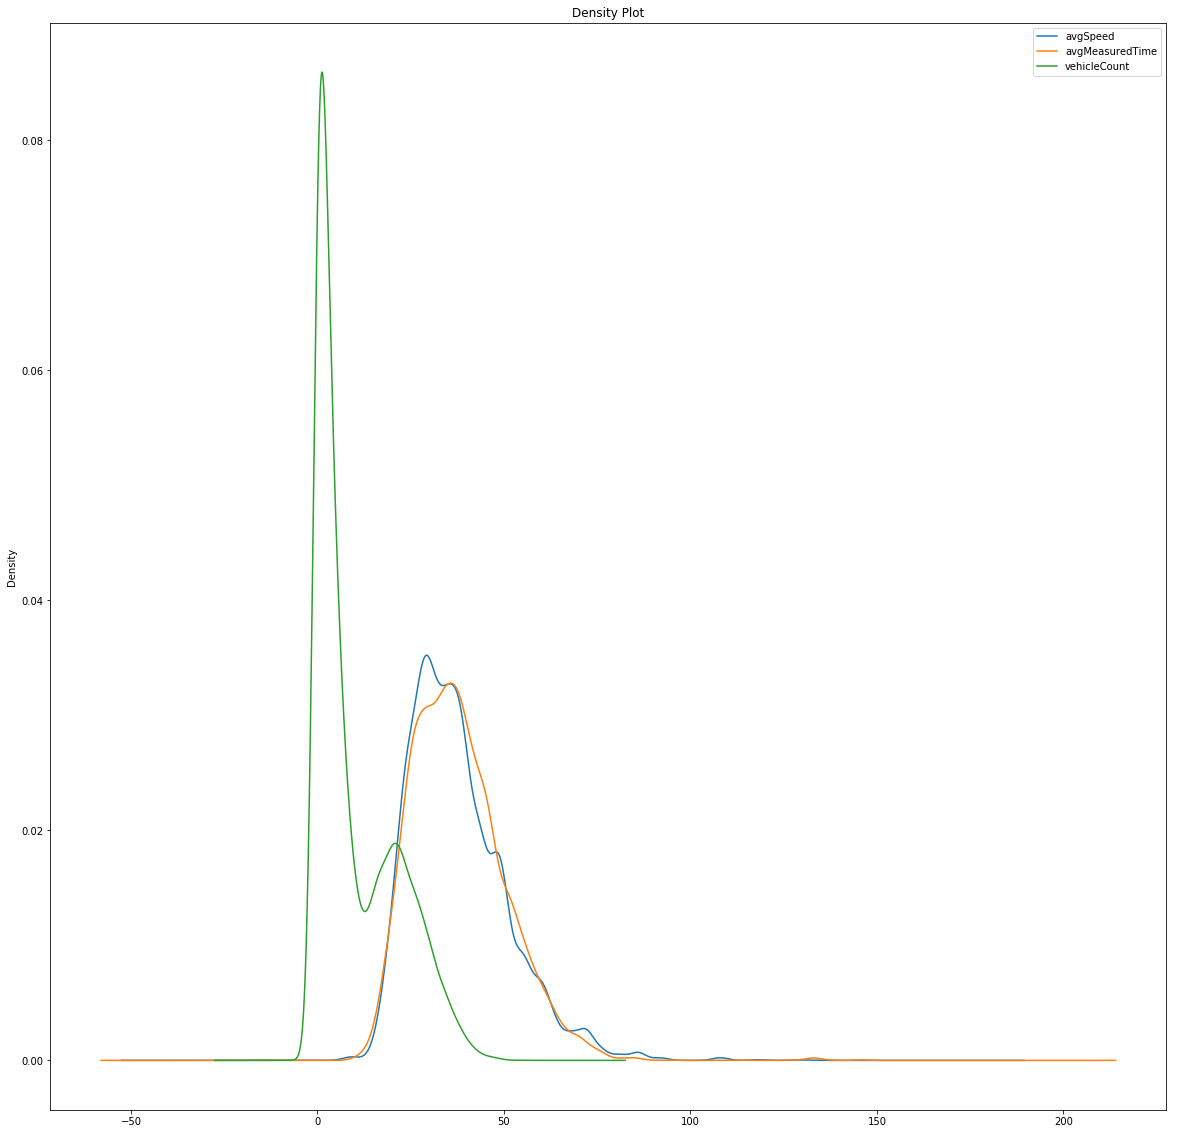

In [28]:
norm_data = df_normed

norm_data.plot(kind="density",
              figsize=(20, 20))
plt.title("Density Plot")

# Plot black line at mean
# plt.vlines(norm_data.mean(), ymin=0, ymax=0.1, linewidth=0.5)
# Plot red line at median
# plt.vlines(norm_data.median(), ymin=0, ymax=0.1, linewidth=0.5, color="red")

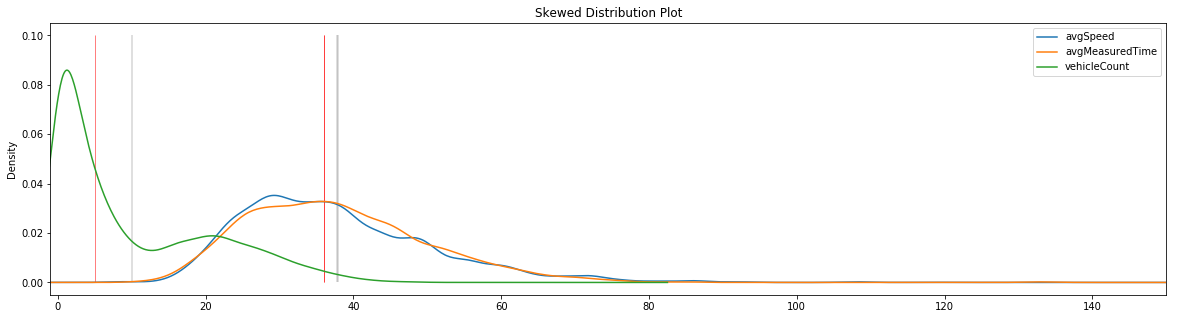

In [46]:
skewed_data = df_normed

skewed_data.plot(kind="density",
              figsize=(20,5),
              xlim=(-1,150))

plt.title('Skewed Distribution Plot')

plt.vlines(skewed_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.1,
           linewidth=0.25)

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.1, 
           linewidth=0.5,
           color="red")


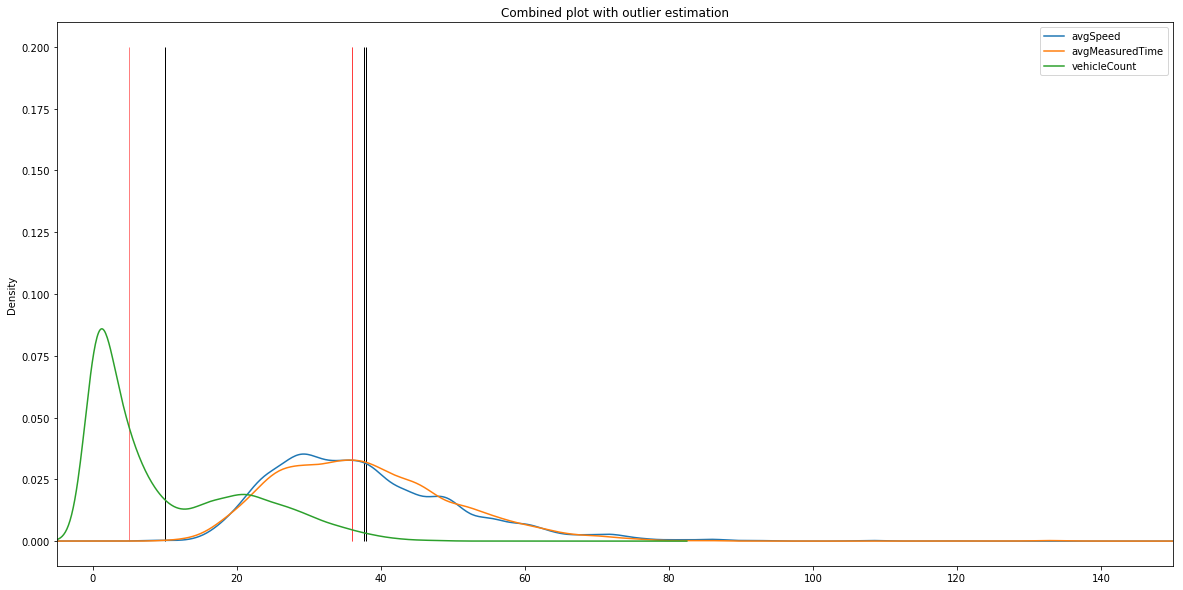

In [40]:
combined_data = df_normed

combined_data.plot(kind="density",
              figsize=(20,10),
              xlim=(-5,150))

plt.title('Combined plot with outlier estimation')
plt.vlines(combined_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=1.0)

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=0.5,
           color="red")



In [51]:
print("Mode")
df.mode()

Mode


,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,40,30,697,40,2014-02-14T00:55:00,0,259525,179064


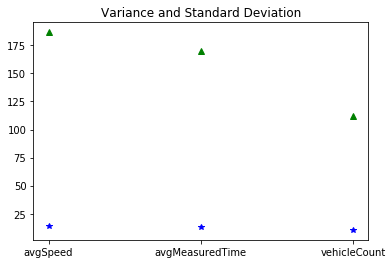

In [99]:
var = []
std = []
for label in labels:
    var.append(df[label].var())
    std.append(df[label].std())
plt.plot(var, 'g^', std, 'b*')
plt.xticks([0, 1, 2], labels)
plt.title("Variance and Standard Deviation")
plt.show()

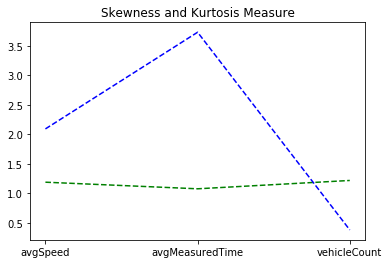

In [101]:
var = []
std = []
for label in labels:
    var.append(df[label].skew())
    std.append(df[label].kurt())
plt.plot(var, 'g--', std, 'b--')
plt.xticks([0, 1, 2], labels)
plt.title("Skewness and Kurtosis Measure")
plt.show()

Text(0.5, 1.0, 'Measures of Spread')

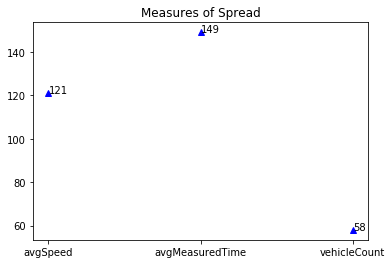

In [102]:
data = []
for label in labels:
    data.append(max(df[label]) - min(df[label]))
    
plt.xticks([0, 1, 2], labels)
plt.plot(data, 'b^')
for a,b in zip([0, 1, 2], data): 
    plt.text(a, b, str(b))
plt.title('Measures of Spread')

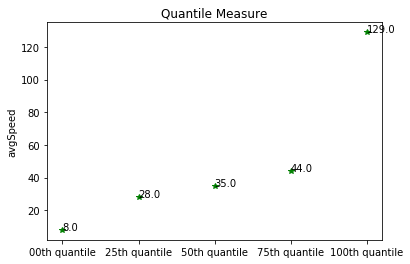

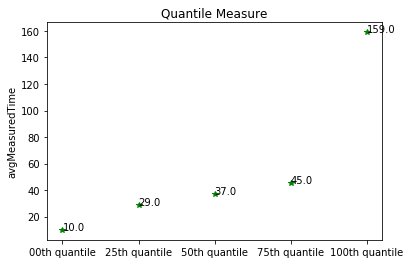

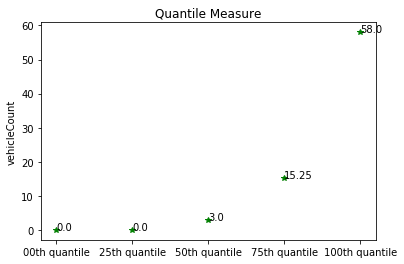

In [77]:
for label in labels:
    
    five_quantiles = [
                df[label].quantile(0),   
                df[label].quantile(0.25),
                df[label].quantile(0.50),
                df[label].quantile(0.75),
                df[label].quantile(1)
            ]
    
    x = [0, 1, 2, 3, 4]
    plt.plot(five_quantiles, 'g*')
    plt.xticks(x, ["00th quantile","25th quantile","50th quantile","75th quantile","100th quantile"])
    plt.title('Quantile Measure')
    plt.ylabel(label)
    for a,b in zip(x, five_quantiles): 
        plt.text(a, b, str(b))
    plt.show()

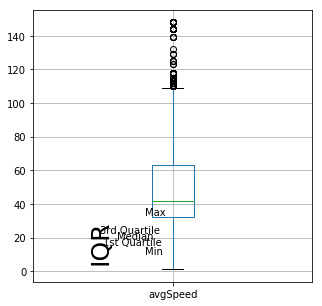

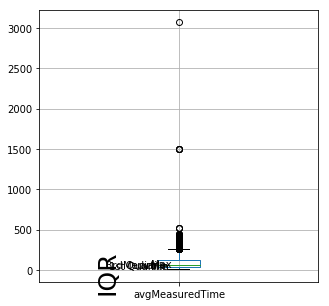

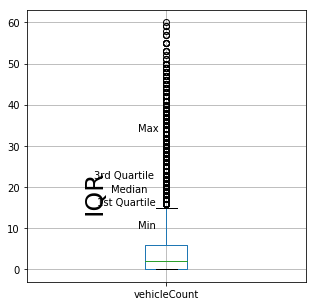

In [97]:

for label in labels:

    df_normed.boxplot(column=label,
                   return_type='axes',
                   figsize=(5,5))

    plt.text(x=0.74, y=22.25, s="3rd Quartile")
    plt.text(x=0.8, y=18.75, s="Median")
    plt.text(x=0.75, y=15.5, s="1st Quartile")
    plt.text(x=0.9, y=10, s="Min")
    plt.text(x=0.9, y=33.5, s="Max")
    plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25)
    plt.show()



(32075, 9)


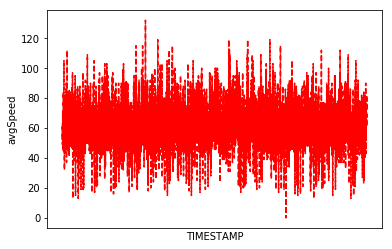

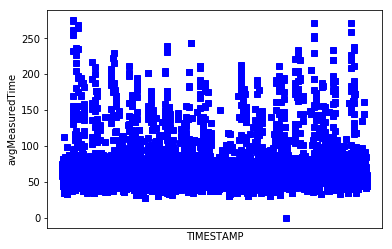

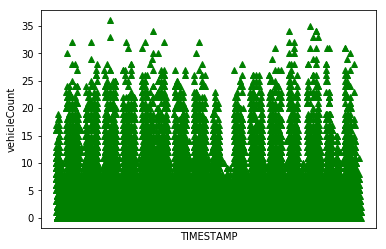

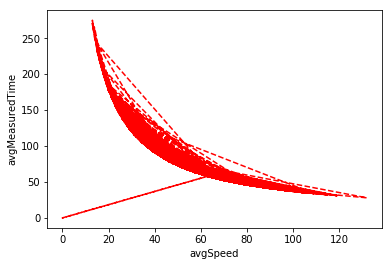

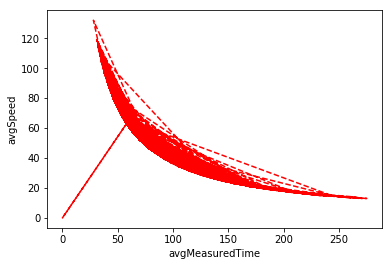

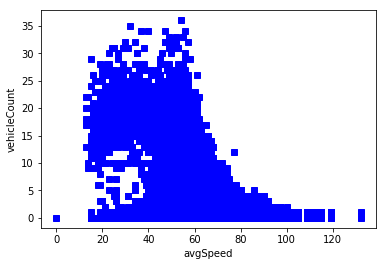

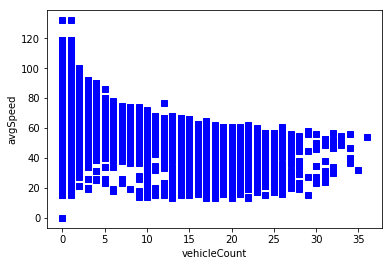

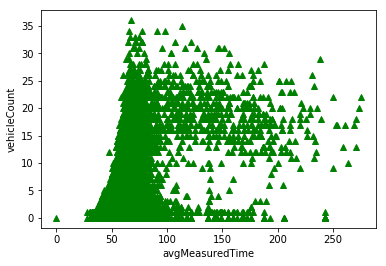

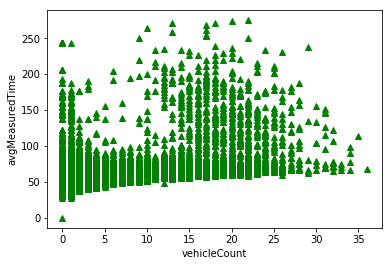

In [21]:
# plots
labels = ['avgSpeed', 'avgMeasuredTime', 'vehicleCount']
icon = ['r--', 'bs', 'g^', 'y1']
TIMESTAMP = "TIMESTAMP"

df = get_single_file()
#against timestamps
for idx, label in enumerate(labels):    
    plt.plot(df[TIMESTAMP], df[label], icon[idx])
    plt.ylabel(label)
    plt.xlabel(TIMESTAMP)
    plt.xticks([])
    plt.show()

combinations = list(itertools.combinations(labels, 2))

for idx, label_tuple in enumerate(combinations):    
    inverse_tuple = (label_tuple[1], label_tuple[0])
    for tuple_ in [label_tuple, inverse_tuple]:
        x_, y_ = tuple_
        plt.plot(df[x_], df[y_], icon[idx])
        plt.ylabel(y_)
        plt.xlabel(x_)
        plt.show()


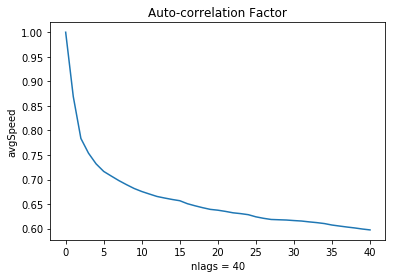

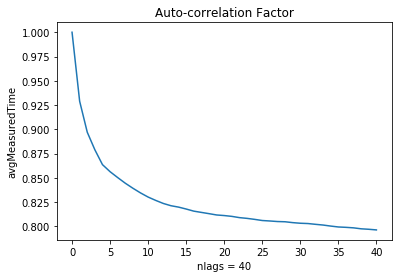

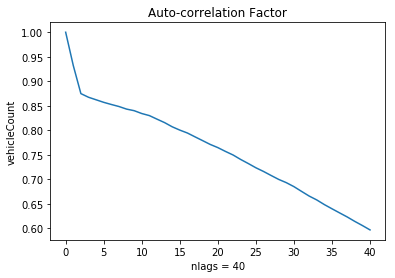

In [22]:
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt

def plot_acf(df, labels):
    for label in labels:
        acf = sm.tsa.stattools.acf(df[label])
        plt.plot(acf)
        plt.ylabel(label)
        plt.xlabel('nlags = 40')
        plt.title('Auto-correlation Factor')
        plt.show()

df = df_.iloc[:100000]
labels = ['avgSpeed', 'avgMeasuredTime', 'vehicleCount']
plot_acf(df, labels)

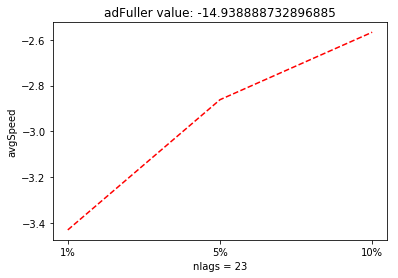

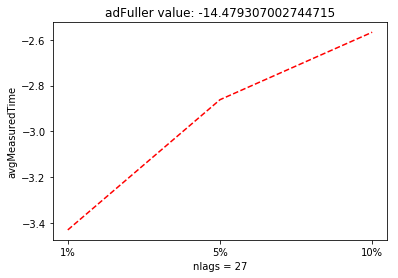

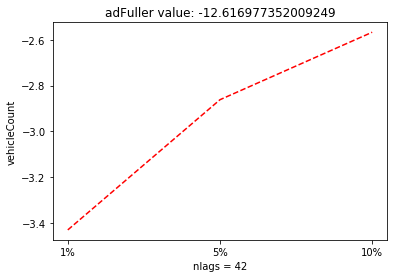

In [23]:
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt

def plot_adf(df, labels):
    for idx, label in enumerate(labels):
        adf = sm.tsa.stattools.adfuller(df[label])
        (keys,values) = zip(*adf[4].items())
        plt.plot(keys, values, icon[0])
        plt.ylabel(label)
        plt.xlabel('nlags = ' + str(adf[2]))
        title = 'adFuller value: ' + str(adf[0])
        plt.title(title)
        plt.show()

df = df_.iloc[:20000]
labels = ['avgSpeed', 'avgMeasuredTime', 'vehicleCount']
plot_adf(df, labels)